## CS559 S21 Final Exam. (105 pts)
### Due: May 15$^{th}$ Saturday 11:59 PM
### Exam Period: Two hours

- **Late Submission Penalty**: Within the exam period, you are allowed to take the exam at any time at your convenience. However, the exam must be submitted within <u>**two hours**</u> from the exam starting time. Any late submissions will be penalized - **5 points for every 5 minutes.**
- **Required File Submission**: Students must submit the exam in two formats - ***HTML*** and ***notebook***. <u>**If either file is missing, the exam will not be graded.**</u> Before the submission, please execute all codes in notebook.  
- **Open Notes and Resource Usability**: Students may use the previous demonstration files provided in class and the lecture notes or textbooks. The use of the internet is prohibited. <u>**Any evidence of cheating or copying from outside resources will mark 0 on the final exam.**</u>
- **Library Use**: You can use any built-in functions and libraries if the descriptions are not specified - some questions may require specific functions and libraries. 

### 1. Probability Theory: (15 pts)
##### Work on notebook and provide answers in dataframes.

A grocery store sells apples from 3 different countries (country A, country B and country C). All the apples from country A are sweet, while 75% of the apples from country B are sweet, and 50% of the apples from country C are sweet. Unfortunately, the sign in the grocery store that would normally indicate where the apples are from is missing. Nevertheless, you buy a bag of apples. Before tasting any apple, you believe that they are from country A with probability 0.5, country B with probability 0.25 and country C with probability 0.25. After tasting 5 apples, you noticed that 4 of them are sweet and 1 of them are not sweet.

#### 1-a: Bayesian learning: what is your posterior belief (after tasting the 5 apples mentioned above) that the apples are from each country? Find the prior, the likelihood, the unnormalized posterior, and the normalized posterior. (8 pts)

In [23]:
## Type Priors -> given
PrA= 0.5
PrB= 0.25
PrC= 0.25

## Type likelihood -> also given
LiA= 1
LiB= 0.75
LiC= 0.5

In [24]:
## Calculate Unnormalized Posterior
UnNormA= 0 # The probability that the 1 not sweet is of country A is 0, since none of the apples from country A are not sweet

# The probability that the you choose an apple from country B with 1 not sweet is:
# (0.25^1(0.75)^4) * (0.25)^1
#   or: the probability that you choose a not sweet apple from the apples * the probability the apples are from country B
UnNormB= 0.01975

# The probability that you choose an apple from country C with 1 not sweet is 
# (0.25*0.5)*0.5^4
UnNormC= 0.007813

## Calculate Normalized Posterior

# Normalization for A: since the probability that the A is not sweet is 0, its going to be 0 still
NormA=0
# Normalization B: probability unNorm B / (Prob unNorm A + prob Unnorm b + prob unnorm C)
NormB=UnNormB / (UnNormA + UnNormB + UnNormC)
# Same as above, but with unnorm C on top
NormC=UnNormC / (UnNormA + UnNormB + UnNormC)

In [25]:
AnswerA={'Country':['A','B','C'],'Prior':[PrA, PrB, PrC],'Likelihood':[LiA,LiB,LiC],
         'Unnormalized Posterior':[UnNormA,UnNormB,UnNormC],'Normalized Posterior':[NormA,NormB,NormC]}

#### 1-b: What is the probability that the next apple that you will taste is sweet according to the Bayesian learning prediction $Pr(Sweet|4sweets,1\sim sweet)$? (7 pts)

In [26]:
# The probability of the baysian learning prediction is equal to
# P(sweet|A) * P(A|4 sweet, 1!Sweet) + P(sweet|B) * P(B|4 sweet, 1!Sweet) + P(sweet|C) * P(C|4 sweet, 1!Sweet)

ProbB=(LiA*NormA)+(LiB*NormB)+(LiC*NormC)
print(ProbB)

0.6791350723796393


### 2. Probabilitic Classification [25 pts]

2-a: Consider the following dataset. The input space has one dimension and there are two classes (+ and -): (0,+), (1,+), (0.9,+), (0.5,+), (1.5, -), (0.7, -), (1.2, -), (0.95,-).  Suppose that we are training a mixture of Gaussians model by maximum likelihood. In computations, use "P" for + and "M" for - classes. DO NOT USE ANY BUILT-IN FUNCTIONS. 
- What are the prior probabilities of each class Pr(+) and Pr(-)? [2pts]
- What is the mean of the conditional distribution of each class and what is the variance (assuming that both class conditional distributions have the same variance)? [3 pts]
- What is the probability $Pr(+|0.8)$? [5 pts]

In [27]:
### Prior Probability Computation:
# Because there are 4 data points for + and 4 data points for -, it stands to reason that the prior prob for each is simply .5
PrP=0.5
PrM=0.5

### Compute mean of each class:
# simply the data point values added up divided by 4, which is the count
meanP=(0+1+0.9+0.5)/4
meanM=(1.5+0.7+1.2+0.95)/4

### Compute variance of each class:
# (0.25((0-0.6)**2)) + (0.25((1-0.6)**2)) + (0.25((0.9-0.6)**2)) + (0.25((0.5-0.6)**2))
varP= 0.155
# (0.25((1.5-1.0875)**2)) + (0.25((0.7-1.0875)**2)) + (0.25((1.2-1.0875)**2)) + (0.25((0.95-1.0875)**2))
varM= 0.1215

### Compute variance
variance= 0.5*varP + 0.5*varM


In [28]:
Answer={'Class':['+','-'],'Prior':[PrP, PrM],'Mean':[meanP,meanM],'Variance':[varP,varM]}
Answer

{'Class': ['+', '-'],
 'Prior': [0.5, 0.5],
 'Mean': [0.6, 1.0875000000000001],
 'Variance': [0.155, 0.1215]}

In [29]:
print("Variance is",variance)

Variance is 0.13824999999999998


2-b: Suppose that you trained a linear classification model on some training data and the resulting weights are $w_0=1$,$w_1=2$,$w_3=-3$. Assuming two classes (+ and -), a data point is predicted to belong to class + when $\sigma(w^T x+w_0 )\ge0.8$. Implement a function `my_class` that classifies the following data points - $(2,1)^T$, $(1,2)^T$, and $(0.5,-1)^T$ - and report the class of each point. `my_class` is a function that classifies individual point. You can use simple math functions but not *ML* algorithms, e.g., Logistic Regression, SVM, etc. [10 pts] 

In [30]:
def my_class(x,w):
    xpoint = x[0]
    ypoint = x[1]
    weight = w
    
    point = (xpoint*weight) + (ypoint*weight)
    
    if((point + weight) >= 0.8):
        return '+'
    else:
        return '-'
    

In [31]:
## Use my_class to verifty the class of each point
b1=my_class([2,1],1)
b2=my_class([1,2],2)
b3=my_class([0.5,-1],-3)

In [32]:
Answer={'Points':['(2,1)','(1,2)','(0.5,-1'],'Class':[b1,b2,b3]}

In [33]:
print(Answer)

{'Points': ['(2,1)', '(1,2)', '(0.5,-1'], 'Class': ['+', '+', '-']}


2-c: Consider the following data set:

|x|y|
|---------|----|
|(1,2)|+|
|(-1,-1)|+|
|(0,2)|-|
|(1,0)|-|

where the first two points belong to class + and the last two points belong to class −. Is it possible for a logistic regression classifier to correctly classify all points in this dataset? If yes, give weights that ensure correct classification? If no, explain why and describe an approach that could be used to modify the logistic regression classifier to correctly classify all those data points? [5 pts]

No, it is not possible to use logistic regression to correctly classify all of these points. As you can see from the plot below, it is not possible to fit a logistic signoid between the positive and negative points and classify them properly. This is because the points are a little mixed.  

The way to modify the logistic regression classifier such that you could correctly classify these data points would be to upscale the data points into a 3rd plane. This would have the effect of creating a 3-dimensional graph/data set, allowing us to classify the data points properly so that way we could still classify this data using a logistic sigmoid plane. This would create a new space that can be separated

<function matplotlib.pyplot.show(close=None, block=None)>

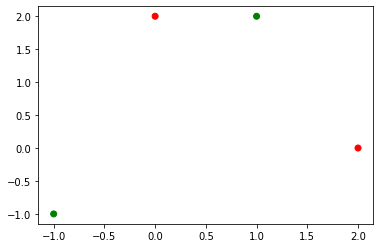

In [41]:
x = [1,-1,0,2]
y = [2,-1,2,0]
classification = ['green','green','red','red']

plt.scatter(x,y, c=classification)
plt.show

Answer Here:
- 

### 3. Maximum Likelihood Estimation [10 pts]

3-a: Consider a data set in which each data point $t_n$ is associated with a weighting factor $r_n>0$, so that the sum-of-squares error function becomes 

$$E_D(w)=\frac{1}{2}\sum_{n=1}^Nr_n(t_n-w^Tx_n)^2$$.
Find an expression for the solution $w^*$ that minimizes this error function. You need to show the work and insert the solution as an image in notebook. You can change "FileName" to the file name of your image. Please submit the image separately if the notebook does not accept the image. 

In [ ]:
<img src="FileName">

### 4. Data Preprocessing. (20 pts)
This question involves data preprocessing that needs to be done before modeling. The data comes from a global company, including orders from 2012 to 2015. Import the dataset `Orders.csv`.

4-a. Check `Profit` and `Sales` in the dataset, convert these two columns to numeric type and name them `New Profit` and "New Sales", respectively. (4 pts)

In [130]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.options.display.max_columns = None

In [131]:
order_data = pd.read_csv('Orders.csv')
order_data.columns = order_data.columns.str.lower()
order_data.head()

,row.id,order.id,order.date,ship.date,ship.mode,customer.id,customer.name,segment,postal.code,city,state,country,region,market,product.id,category,sub.category,product.name,sales,quantity,discount,profit,shipping.cost,order.priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [132]:
order_data['profit'] = order_data['profit'].replace('[\$,]', '', regex=True)
order_data['sales'] = order_data['sales'].replace('[\$,]', '', regex=True)

order_data["new_profit"] = pd.to_numeric(order_data['profit'])
order_data["new_sales"] = pd.to_numeric(order_data['sales'])

In [133]:
order_data[['profit','new_profit','sales','new_sales']].head(5)

,profit,new_profit,sales,new_sales
0,62.15,62.15,221.98,221.98
1,-288.77,-288.77,3709.40,3709.40
2,919.97,919.97,5175.17,5175.17
3,-96.54,-96.54,2892.51,2892.51
4,311.52,311.52,2832.96,2832.96


4-b. Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year’s inventory. He wants you to answer the following questions: (4 pts)
- Is there any seasonal sales trend in your company?
- Is there any seasonal trend of different categories of products?

In [134]:
date = pd.to_datetime(order_data['order.date'])
order_data['year'] = date.dt.year
order_data['month'] = date.dt.month

seasons = ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Fall', 'Fall', 'Fall', 'Winter']
month_to_season = dict(zip(range(1,13), seasons))

order_data['season'] = date.dt.month.map(month_to_season)

In [135]:
sales_seasonal = order_data[['year', 'month', 'season', 'sales']]
print(sales_seasonal)

       year  month  season    sales
0      2014     11    Fall   221.98
1      2014      2  Winter  3709.40
2      2014     10    Fall  5175.17
3      2014      1  Winter  2892.51
4      2014     11    Fall  2832.96
...     ...    ...     ...      ...
51285  2015      6  Summer    65.10
51286  2014      5  Spring    16.72
51287  2012      8  Summer     8.56
51288  2013      2  Winter    13.44
51289  2013      5  Spring    61.38

[51290 rows x 4 columns]


In [136]:
winter_sales = 0
spring_sales = 0
summer_sales = 0
fall_sales = 0

for x in range (1,sales_seasonal.shape[0]):
    if(sales_seasonal['season'][x]=='Winter'):
        sale = float(sales_seasonal['sales'][x])
        winter_sales = winter_sales + sale
    elif(sales_seasonal['season'][x]=='Spring'):
        sale = float(sales_seasonal['sales'][x])
        spring_sales = spring_sales + sale
    elif(sales_seasonal['season'][x]=='Summer'):
        sale = float(sales_seasonal['sales'][x])
        summer_sales = summer_sales + sale
    else:
        sale = float(sales_seasonal['sales'][x])
        fall_sales = fall_sales + sale
print(winter_sales)

seasonal_sales = [winter_sales, spring_sales, summer_sales, fall_sales]

2798102.499999986


<BarContainer object of 4 artists>

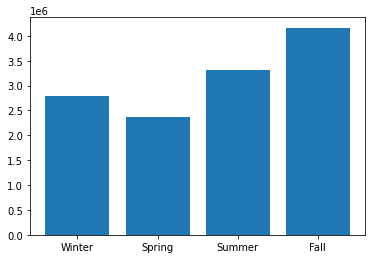

In [137]:
plt.bar(['Winter', 'Spring', 'Summer', 'Fall'], seasonal_sales)

As we can see, the yearly sales seem to increase dramatically during the summer and fall seasons, and falls between winter and spring.

4-c. Your manager required you to give a brief report (Plots + Interpretations) on returned orders from the `Returns.csv` dataset. (10 pts)

- How much profit did we lose for each year?
- How many customer returned more than once? more than 10 times?
- Which regions are more likely to return orders?
- Which categories (sub-categories) of products are more likely to be returned?
- Will different ship mode affect the possibility of return? Standard class is the most common ship mode, but it is not necessarily true that its return ratio is also the highest.
- Hint: 
    - Import Returns.csv
    - Merge the Returns dataframe you imported with the Orders dataframe.
    - One order might contains multiple products so you will have more observations after the merge.

In [173]:
return_data = pd.read_csv('returns.csv')

merged_data = return_data.merge(order_data, left_on='Order ID', right_on='order.id', how='outer')

- How much profit did we lose for each year?

In [174]:
print(merged_data['year'].unique())

profit_2012 = 0
profit_2013 = 0
profit_2014 = 0
profit_2015 = 0


for x in range(0, merged_data.shape[0]):
    if(merged_data['year'][x] == 2012):
        profit_2012 += float(merged_data['profit'][x])
    elif(merged_data['year'][x] == 2013):
        profit_2013 += float(merged_data['profit'][x])
    elif(merged_data['year'][x] == 2014):
        profit_2014 += float(merged_data['profit'][x])      
    else:
        profit_2015 += float(merged_data['profit'][x])   

print(profit_2012)
print(profit_2013)
print(profit_2014)
print(profit_2015)

[2012 2015 2014 2013]
248940.35000000126
307415.32999999844
406934.88999999955
504166.099999999


- How many customer returned more than once? more than 10 times?

- Which regions are more likely to return orders?

In [198]:
# The idea is to create a data frame of regions and returned count, and then for each returned Yes or No, increment returned count


merged_data['Returned'] = merged_data['Returned'].replace(np.nan, 'No')

merged_data['Region'].unique()

region_count = pd.DataFrame()
region_count['Region'] = merged_data['Region'].unique()
region_count['Returned Count'] = 0
print(region_count)


               Region  Returned Count
0          Central US               0
1        Eastern Asia               0
2             Oceania               0
3      Western Europe               0
4     Southern Europe               0
5        Western Asia               0
6         Southern US               0
7     Southern Africa               0
8          Eastern US               0
9      Eastern Europe               0
10  Southeastern Asia               0
11         Western US               0
12      Southern Asia               0
13    Northern Europe               0
14     Eastern Canada               0
15    Central America               0
16      South America               0
17       North Africa               0
18          Caribbean               0
19     Central Africa               0
20     Western Africa               0
21     Eastern Africa               0
22       Central Asia               0
23     Western Canada               0
24                NaN               0


In [200]:
for x in range(0, merged_data.shape[0]):
    region_name = merged_data['Region'][x]
    
    region_count.region_name['Returned Count'] += 1

print(region_count)

AttributeError: 'DataFrame' object has no attribute 'merged_data'

- Which categories (sub-categories) of products are more likely to be returned?

- Will different ship mode affect the possibility of return? Standard class is the most common ship mode, but it is not necessarily true that its return ratio is also the highest.

4-d. Add a column "Order_Month” with the month that the order was submitted. (3 pts)

In [163]:
merged_data.rename(columns = {'month': 'Order_Month'}, inplace = True)
merged_data.head()

,row.id,order.id,order.date,ship.date,ship.mode,customer.id,customer.name,segment,postal.code,city,state,country,region,market,product.id,category,sub.category,product.name,sales,quantity,discount,profit,shipping.cost,order.priority,new_profit,new_sales,year,Order_Month,season,Returned,Order ID,Region,Unnamed: 3,Unnamed: 4
0,30191,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,FUR-TA-5060,Furniture,Tables,"Lesro Conference Table, with Bottom Storage",1715.16,2,0.0,720.36,725.57,Critical,720.36,1715.16,2012,12,Winter,Yes,IN-2012-PB19210127-41259,Eastern Asia,NaN,NaN
1,30190,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,FUR-BO-5762,Furniture,Bookcases,"Safco Classic Bookcase, Pine",2197.50,5,0.0,153.75,627.27,Critical,153.75,2197.50,2012,12,Winter,Yes,IN-2012-PB19210127-41259,Eastern Asia,NaN,NaN
2,30187,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,FUR-TA-5065,Furniture,Tables,"Lesro Round Table, with Bottom Storage",1356.03,3,0.0,311.85,458.97,Critical,311.85,1356.03,2012,12,Winter,Yes,IN-2012-PB19210127-41259,Eastern Asia,NaN,NaN
3,30193,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,FUR-CH-5454,Furniture,Chairs,"Office Star Swivel Stool, Adjustable",882.15,5,0.0,114.60,203.92,Critical,114.60,882.15,2012,12,Winter,Yes,IN-2012-PB19210127-41259,Eastern Asia,NaN,NaN
4,30189,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,TEC-MA-5494,Technology,Machines,"Okidata Calculator, Red",148.32,3,0.0,68.22,25.48,Critical,68.22,148.32,2012,12,Winter,Yes,IN-2012-PB19210127-41259,Eastern Asia,NaN,NaN


4-e. Generate a categorical variable which indicates whether an order has been returned or not. (3 pts)

4-f. Generate a feature which can measure how long it takes the company to process each order. (Process.Time = Ship.Date - Order.Date) (3 pts)

In [166]:
merged_data['Process.Time'] = pd.to_datetime(merged_data['ship.date']) - pd.to_datetime(merged_data['order.date'])

merged_data.head()

,row.id,order.id,order.date,ship.date,ship.mode,customer.id,customer.name,segment,postal.code,city,state,country,region,market,product.id,category,sub.category,product.name,sales,quantity,discount,profit,shipping.cost,order.priority,new_profit,new_sales,year,Order_Month,season,Returned,Order ID,Region,Unnamed: 3,Unnamed: 4,Process.Time
0,30191,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,FUR-TA-5060,Furniture,Tables,"Lesro Conference Table, with Bottom Storage",1715.16,2,0.0,720.36,725.57,Critical,720.36,1715.16,2012,12,Winter,Yes,IN-2012-PB19210127-41259,Eastern Asia,NaN,NaN,3 days
1,30190,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,FUR-BO-5762,Furniture,Bookcases,"Safco Classic Bookcase, Pine",2197.50,5,0.0,153.75,627.27,Critical,153.75,2197.50,2012,12,Winter,Yes,IN-2012-PB19210127-41259,Eastern Asia,NaN,NaN,3 days
2,30187,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,FUR-TA-5065,Furniture,Tables,"Lesro Round Table, with Bottom Storage",1356.03,3,0.0,311.85,458.97,Critical,311.85,1356.03,2012,12,Winter,Yes,IN-2012-PB19210127-41259,Eastern Asia,NaN,NaN,3 days
3,30193,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,FUR-CH-5454,Furniture,Chairs,"Office Star Swivel Stool, Adjustable",882.15,5,0.0,114.60,203.92,Critical,114.60,882.15,2012,12,Winter,Yes,IN-2012-PB19210127-41259,Eastern Asia,NaN,NaN,3 days
4,30189,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,TEC-MA-5494,Technology,Machines,"Okidata Calculator, Red",148.32,3,0.0,68.22,25.48,Critical,68.22,148.32,2012,12,Winter,Yes,IN-2012-PB19210127-41259,Eastern Asia,NaN,NaN,3 days


4-g. Generate a feature indictes how many times the product has been returned before. (3 pts)

### 5. Classification Problem. (35 pts)
In this problem, the task is to classify using a given data set, `Data1_Class.csv`, with two features, $X$ and $Y$, and class labels. 

In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [44]:
Data1=pd.read_csv('Data1_Class.csv')

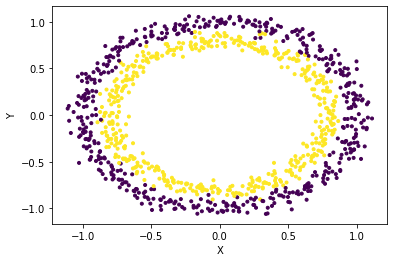

In [45]:
plt.scatter(Data1['X'], Data1['Y'], c=Data1['Class'], marker = '.') 
plt.ylabel('Y')
plt.xlabel('X')
plt.show() 

5-a: From the visual inspection above, explain how you can make a classifier without Kernel. [5 pts]

From the visual inspection above, my first instinct is to use a K-nearest neighbors algorithm to classify the data. This is because the data points seems to be separated/localized into two different regions.

5-b: Do EDA and feature engineering as you explained in 5-a and call the new dataframe as `Data1_training`. [10 pts]

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(Data1.iloc[:,2:], 
                                                    Data1.iloc[:,1], 
                                                    train_size = 0.8, test_size = 0.2, random_state=1)


In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

In [59]:
knn.fit(X_train, y_train)

knn.predict(X_test)

knn.score(X_test, y_test)

0.99

5-c: Using new `Data1_training`, perform the classification using Logistic Regression. [5 pts]

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(Data1.iloc[:,2:], 
                                                    Data1.iloc[:,1], 
                                                    train_size = 0.8, test_size = 0.2, random_state=1)


In [155]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [156]:
y_pred = model1.predict(X_test)

In [157]:
model1.score(X_test, y_test)

0.415

5-d: How would you classify directly without any pre-processing? Explain. [5 pts]

One classification method that does not require preprosessing is the decision tree classification method.  

The decision tree classification method uses a tree-like algorithm, which does not require scaling or normalization.

5-e: perform the classification as explained in 5-d. [10 pts]

In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.945
